<img align="left" src="img/ECE364-logo.png" width="300px" style="padding:30px;border:thin solid white;"> 

# Lecture 9 - Classification and Logisitic regression
## ECE364 - Programming Methods for Machine Learning
### Nickvash Kani 












###### Slides based off prior lectures by Alex Schwing, Aigou Han, Farzad Kamalabadi, Corey Snyder. All mistakes are my own!

Things we'll discuss in this lecture

- Linear classification
- Weaknesses of linear classification 
- Support vector machines
- Logistic regression


## Classification introduction 

In the previous lectures, we talked about linear regression, i.e. fitting a linear model to data so we can use that model in the future to predict a dependent variable for some input. 

But lots of data is not continuous. Think of gender, race, species, ... none of those things are continous variables you can fit data to. What we need are models that can predict classifications, 0/1's yes/no's, etc. 

Next two lectures are on classifiers.


### Binary linear classification

- **classification**: predict a discrete-valued target
- **binary**: predict a binary target $t \in \{0,1\}$
  - Training examples with $t = 1$ are called **positive examples**, and training examples with $t = 0$ are called **negative examples**.
- **linear**: model is a linear function of **x**, followed by a threshold:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

$$
y =
\begin{cases}
  1 & \text{if } z \geq r \\
  0 & \text{if } z < r
\end{cases}
$$

[1]

### Some simplifications

**Eliminating the threshold**

- We can assume **WLOG** (Without Loss Of Generality) that the threshold $r = 0$:

$$
\mathbf{w}^T \mathbf{x} + b \geq r \Longleftrightarrow \mathbf{w}^T \mathbf{x} + b - r \geq 0.
$$

Define $b' = b - r$:

$$
\mathbf{w}^T \mathbf{x} + b' \geq 0.
$$

**Eliminating the bias**

- Add a dummy feature $x_0$ which always takes the value 1. The weight $w_0$ is equivalent to a bias.

**Simplified model**

$$
z = \mathbf{w}^T \mathbf{x}
$$

$$
y =
\begin{cases}
  1 & \text{if } z \geq 0 \\
  0 & \text{if } z < 0
\end{cases}
=H(z)
$$

Where $H(x)$ is the Heaviside step function. It's very similar to the $\text{sign}(x)$ which steps between -1 and 1. 

[1] 

## Some simple binary functions using classifiers [1]

 ### NOT

<div style="width: 150px;">

| $x_0$ | $x_1$ | | $t$ |
|:------|:------|:-:|:----|
|   1   |   0   | |  1  |
|   1   |   1   | |  0  |

</div>

$$
b > 0 \\
b + w < 0
$$

$$
b = 1, \quad w = -2
$$


### AND
<div style="width: 200px;">

| $x_0$ | $x_1$ | $x_2$ | | $t$ |
|:------|:------|:------|:-:|:----|
|   1   |   0   |   0   | |  0  |
|   1   |   0   |   1   | |  0  |
|   1   |   1   |   0   | |  0  |
|   1   |   1   |   1   | |  1  |

</div>    
$$
\begin{aligned}
b &< 0 \\
b + w_2 &< 0 \\
b + w_1 &< 0 \\
b + w_1 + w_2 &> 0
\end{aligned}
$$

$$
b = -1.5, \quad w_1 = 1, \quad w_2 = 1
$$


### XOR
<div style="width: 200px;">

| $x_0$ | $x_1$ | $x_2$ | | $t$ |
|:------|:------|:------|:-:|:----|
|   1   |   0   |   0   | |  0  |
|   1   |   0   |   1   | |  1  |
|   1   |   1   |   0   | |  1  |
|   1   |   1   |   1   | |  0  |

</div>    

XOR is not linearly seperable. 

<img align="center" src="img/linearly_seperable_xor.png" width="300px" style="padding:30px;border:thin solid white;"> 


Quick aside, XOR in particular can be linearly seperable if we choose a good feature map. But not all functions can be linearly seperated this way: 

$$
\phi(\mathbf{x}) = 
\begin{pmatrix}
x_1 \\
x_2 \\
x_1 x_2
\end{pmatrix}
$$

<div style="width: 300px;">

| $x_1$ | $x_2$ | $\phi_1 $ | $\phi_2$ | $\phi_3$ | | $t$ |
|:-----|:-----|:---------------------|:---------------------|:---------------------|:-:|:---|
|   0   |   0   |           0           |           0           |           0           | |  0  |
|   0   |   1   |           0           |           1           |           0           | |  1  |
|   1   |   0   |           1           |           0           |           0           | |  1  |
|   1   |   1   |           1           |           1           |           1           | |  0  |

</div>    

## Too much data for classification? 

Suppose we have the following data:

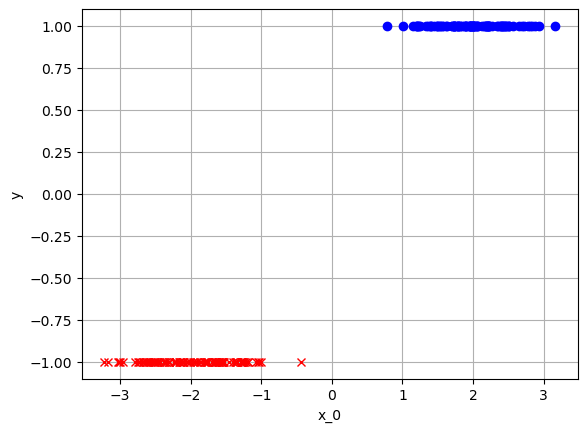

In [2]:
import torch
import matplotlib.pyplot as plt
x1 = torch.cat([0.5*torch.randn((100,))-2, 0.5*torch.randn((100,))+2],dim=0)
y = torch.cat([-torch.ones(100,1), torch.ones(100,1)],dim=0)
plt.plot(x1[0:100],y[0:100],'rx')
plt.plot(x1[100:200],y[100:200],'bo')
plt.xlabel('x_0')
plt.ylabel('y')
plt.grid(True)
plt.show()

Want to do a linear classification:

So we do the same steps as normal: 

$$ w = (XX^T)^{-1}Xy$$

In [4]:
XT = torch.cat([x1.unsqueeze(0),torch.ones_like(x1).unsqueeze(0)],dim=0).t()
w = torch.inverse(XT.t()@XT)@XT.t()@y

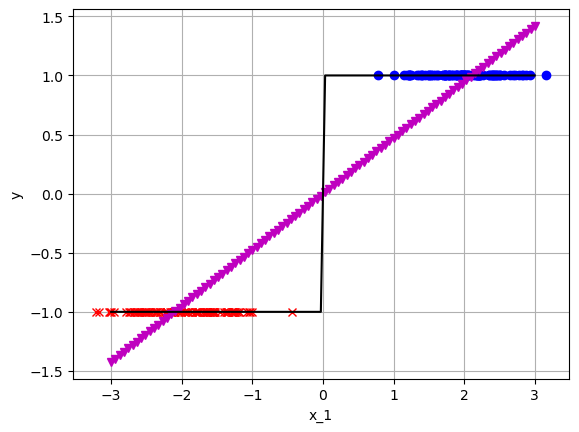

In [5]:
xaxis = torch.linspace(-3,3,100)
regressionoutput = torch.cat([xaxis.unsqueeze(0),torch.ones_like(xaxis).unsqueeze(0)],dim=0).t()@w
clfoutput = torch.sign(regressionoutput)
plt.plot(x1[0:100],y[0:100],'rx')
plt.plot(x1[100:200],y[100:200],'bo')
plt.plot(xaxis,regressionoutput,'-mv')
plt.plot(xaxis,clfoutput,'-k')
plt.xlabel('x_1')
plt.ylabel('y')
plt.grid(True)
plt.show()

Let's say we get even more data: 

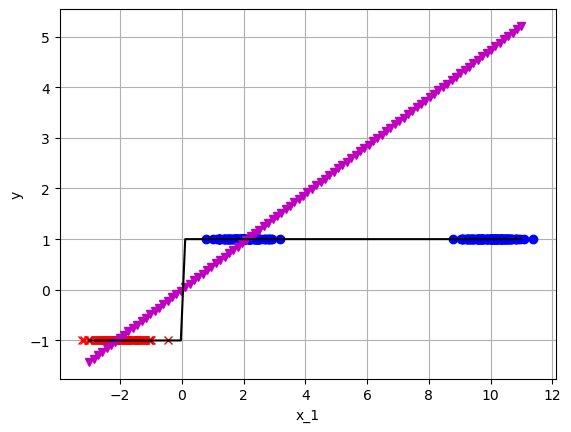

In [6]:
x1_new = torch.cat([x1, 0.5*torch.randn((100,))+10],dim=0)
y_new = torch.cat([y, torch.ones(100,1)],dim=0)
xaxis = torch.linspace(-3,11,100)
regressionoutput_old = torch.cat([xaxis.unsqueeze(0),torch.ones_like(xaxis).unsqueeze(0)],dim=0).t()@w
clfoutput_old = torch.sign(regressionoutput_old)
plt.plot(x1_new[0:100],y_new[0:100],'rx')
plt.plot(x1_new[100:],y_new[100:],'bo')
plt.plot(xaxis,regressionoutput_old,'-mv')
plt.plot(xaxis,clfoutput_old,'-k')
plt.xlabel('x_1')
plt.ylabel('y')
plt.grid(True)
plt.show()

Looks good. Old model still works visually but just to be sure, let's do the fit again....

In [7]:
XT_new = torch.cat([x1_new.unsqueeze(0),torch.ones_like(x1_new).unsqueeze(0)],dim=0).t()
w_new = torch.inverse(XT_new.t()@XT_new)@XT_new.t()@y_new

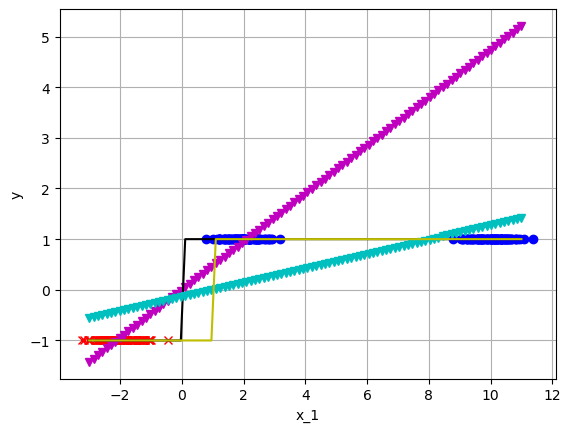

In [8]:
regressionoutput_new = torch.cat([xaxis.unsqueeze(0),torch.ones_like(xaxis).unsqueeze(0)],dim=0).t()@w_new
clfoutput_new = torch.sign(regressionoutput_new)
plt.plot(x1_new[0:100],y_new[0:100],'rx')
plt.plot(x1_new[100:],y_new[100:],'bo')
plt.plot(xaxis,regressionoutput_old,'-mv')
plt.plot(xaxis,clfoutput_old,'-k')
plt.plot(xaxis,regressionoutput_new,'-cv')
plt.plot(xaxis,clfoutput_new,'-y')
plt.xlabel('x_1')
plt.ylabel('y')
plt.grid(True)
plt.show()

- How come this new easy data screws up things?
- Shouldn't we get a better classifier if we train with more data?
- What is going wrong?

## Support Vector Machines

The big issue with the previous graph was that all points contributed equally to the boundary decision. 

But should we really do this? Isn't it more important to just make sure everything is on the correct side of the barrier? and move on? 

Let's consider a new motivating example: 

<img align="center" src="img/SVM_example_2D.png" width="600px" style="padding:30px;border:thin solid white;"> 

Thanks to [2] for a great image and explanation of SVMs

Let's assume blue (+1) circles are in the positive class and red x's (-1) are in the negative class (we'll call this the target ($t$)). For each training point $x^{(i)}$, we want: 

- $W x^{(i)} > 1$ if $t^{(i)} = 1$
- $W x^{(i)} < -1$ if $t^{(i)} = -1$

if we use the label $t^{(i)}$, we can get the following for both cases: $t^{(i)} \cdot W x^{(i)} > 1$ or  $1 - t^{(i)} \cdot W x^{(i)} < 0$.

This inequality is satisfied as long as $\vert Wx^(i) \vert > 1$ but beyond that point, we should we care? Why not just tell the model to work to satisfy this inequality but no more. We do this by using the max function $\max \left( 0,1 - t^{(i)} \cdot W x^{(i)} \right)$ so the total loss function becomes: 

$$
\mathcal{L} = \sum \max\left( 0, 1- t^{(i)} \cdot W x^{(i)} \right)^2
$$

We can figure out the width of the margin. The top line has the formula $Wx_1=1$ and the bottom has the formula $Wx_2=-1$. Subtract both sides of both equations gives us: $W * (x_1-x_2)[1:] = 2 $ which means $ (x_1-x_2)[1:] = \frac{2}{W}$ (getting rid of the bias term). Hence the distance becomes $ \vert x \vert  = \frac{2}{\vert W \vert }$.

We want to maximize the margin $\frac{2}{\vert W \vert }$ which is the same as minimizing the value $\frac{\vert W[1:] \vert}{2}$. Hence the loss function becomes: 

$$
\mathcal{L} = \frac{\vert W[1:] \vert}{2} + C\sum \max\left( 0, 1 - t^{(i)} \cdot W x^{(i)} \right)^2
$$

We included a term $C$ to tell the modify how much to priortize the margin vs fit of the boundary. This is the loss function we need to minimize.  


So let's test our linear SVM model in code: 

Initial guesses: w0=0.893770, w1=-1.008023, w2=0.837386
Final guesses: w0=0.045273, w1=-0.239979, w2=-1.286974


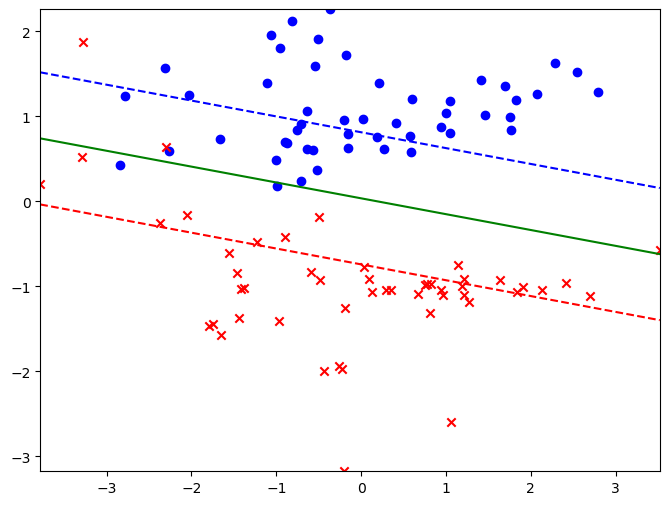

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(42)

xa, ta = make_classification(n_features=2, n_redundant=0, random_state=25, n_informative=2, n_clusters_per_class=2, n_classes=2)
for i in range(len(ta)):
    if ta[i] == 0: ta[i] = 1
    else: ta[i] = -1
x = torch.tensor(xa)
t = torch.tensor(ta, dtype=torch.float64)
X = torch.column_stack((torch.ones(x.shape[0]), x))

# initialize guesses for w, b
w_gd = torch.randn((3), requires_grad=True, dtype=torch.float64) # size (1,)
print('Initial guesses: w0={:.6f}, w1={:.6f}, w2={:.6f}'.format(w_gd[0].data, w_gd[1].data, w_gd[2].data))
                       
                       
# information for tracking
b_vals = [w_gd[0].data.item()]
w1_vals = [w_gd[1].data.item()]
w2_vals = [w_gd[2].data.item()]

C = 500                     
# gradient descent loop
n_iter = 1000 # number of iterations
alpha = 1e-6 # step size
for n in range(n_iter):
    temp = t*(X@w_gd)
    error = torch.ones(X.shape[0])-t*(X@w_gd)
    loss_lin, q = torch.max(torch.column_stack((torch.zeros(X.shape[0]), error)), dim=1)
    #loss = loss_lin.t()@loss_lin
    loss = w_gd.t()@w_gd + C*(loss_lin.t()@loss_lin)
    loss.backward()
    with torch.no_grad():
        w_gd -= alpha*w_gd.grad
        w_gd.grad = None
        
    # log information
    w2_vals.append(w_gd[2].data.item())
    w1_vals.append(w_gd[1].data.item())
    b_vals.append(w_gd[0].data.item())
    
# examine solution
print('Final guesses: w0={:.6f}, w1={:.6f}, w2={:.6f}'.format(w_gd[0].data, w_gd[1].data, w_gd[2].data))


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xa[t == -1, 0], xa[t == -1, 1], c='blue', marker='o', label='Class -1')
ax.scatter(xa[t == 1, 0], xa[t == 1, 1], c='red',  marker='x', label='Class 1')
linestyles = ['dashed', 'solid', 'dashed']
linecolors = ['blue', 'green', 'red']
offsets = [1, 0, -1]
for i in range(len(offsets)):
    xx = np.arange(min(x[:,0]),max(x[:,0]),0.1)
    yy = -1*(offsets[i]+w1_vals[-1]*xx + b_vals[-1])/w2_vals[-1]
    ax.plot(xx,yy,linestyle=linestyles[i], color=linecolors[i])
plt.axis([min(x[:,0]),max(x[:,0]), min(x[:,1]),max(x[:,1])])
# Save and Show
# plt.savefig("./img/losses_contours.png", dpi=300)
plt.show()



Let's refer back to our motivating graph and use support vector machines to classify it: 

/var/folders/dl/klptcn0j6cz_5lxgh6mxyd_r0000gn/T/ipykernel_63154/727223333.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(xa, dtype=torch.float64)
/var/folders/dl/klptcn0j6cz_5lxgh6mxyd_r0000gn/T/ipykernel_63154/727223333.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(ta, dtype=torch.float64)


Initial guesses: w0=0.437901, w1=1.090453
Final guesses: w0=-0.080102, w1=7.892636


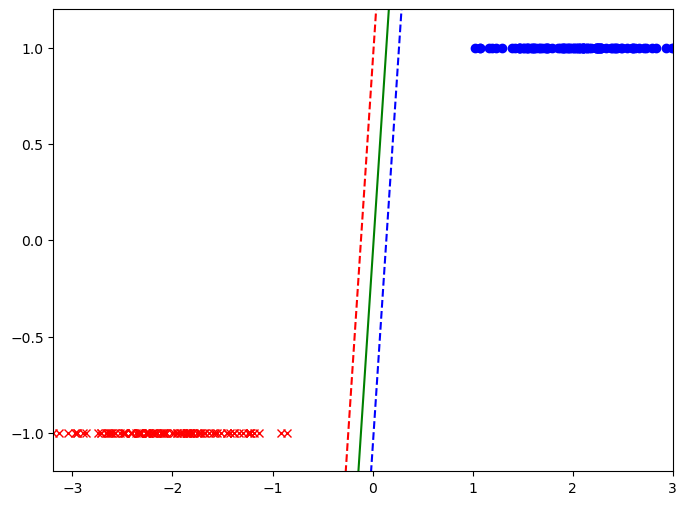

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(42)

xa = torch.cat([0.5*torch.randn((100,))-2, 0.5*torch.randn((100,))+2],dim=0)
ta = torch.cat([-torch.ones(100,1), torch.ones(100,1)],dim=0)
x = torch.tensor(xa, dtype=torch.float64)
t = torch.tensor(ta, dtype=torch.float64)
X = torch.column_stack((torch.ones(x.shape[0]), x))

# initialize guesses for w, b
w_gd = torch.randn((2), requires_grad=True, dtype=torch.float64) # size (1,)
print('Initial guesses: w0={:.6f}, w1={:.6f}'.format(w_gd[0].data, w_gd[1].data))
                         
# information for tracking
b_vals = [w_gd[0].data.item()]
w1_vals = [w_gd[1].data.item()]

C = 500                     
# gradient descent loop
n_iter = 1000 # number of iterations
alpha = 1e-6 # step size
for n in range(n_iter):
    temp = t*(X@w_gd)
    error = torch.ones(X.shape[0])-t*(X@w_gd)
    loss_lin, q = torch.max(torch.column_stack((torch.zeros(X.shape[0]), error)), dim=1)
    #loss = loss_lin.t()@loss_lin
    loss = w_gd.t()@w_gd + C*(loss_lin.t()@loss_lin)
    loss.backward()
    with torch.no_grad():
        w_gd -= alpha*w_gd.grad
        w_gd.grad = None
        
    # log information
    w1_vals.append(w_gd[1].data.item())
    b_vals.append(w_gd[0].data.item())
    
# examine solution
print('Final guesses: w0={:.6f}, w1={:.6f}'.format(w_gd[0].data, w_gd[1].data))


fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(xa[0:100],ta[0:100],'rx')
plt.plot(xa[100:200],ta[100:200],'bo')
linestyles = ['dashed', 'solid', 'dashed']
linecolors = ['blue', 'green', 'red']
offsets = [-1, 0, 1]
for i in range(len(offsets)):
    xx = np.arange(min(x),max(x),0.1)
    yy = offsets[i]+w1_vals[-1]*xx + b_vals[-1]
    ax.plot(xx,yy,linestyle=linestyles[i], color=linecolors[i])
plt.axis([min(xa),max(xa), -1.2, 1.2])
# Save and Show
# plt.savefig("./img/losses_contours.png", dpi=300)
plt.show()


## Logistic Regression

Instead of regressing a line $w^Tx$ let's regress the sigmoid function $$\frac{1}{1+\exp(-w^Tx)} \in [0,1]$$

How, i.e., what's the goal?

- whenever an annotated datapoint $(x^{(i)}, t^{(i)})$ has a label $t^{(i)} = 1$ we want the sigmoid function to be as large as possible, i.e., as close as possible to 1
- whenever an annotated datapoint $(x^{(i)}, t^{(i)})$ has a label $t^{(i)} = -1$ we want the sigmoid function to be as small as possible, i.e., as close as possible to 0
- this last point can be formulated differently: whenever an annotated datapoint $(x^{(i)}, t^{(i)})$ has a label $t^{(i)} = -1$ we want one minus the sigmoid function to be as large as possible, i.e., as close as possible to 1: $$1 - \frac{1}{1+\exp(-w^Tx)} = \frac{1}{1+\exp(w^Tx)}$$

Taking into account $t^{(i)}\in\{-1,1\}$ we can combine both goals (same logic as before!):
- our goal is to make the following as large as possible: $$\frac{1}{1+\exp(-t^{(i)}w^Tx^{(i)})}$$

Because this function varies between 0 and 1, it is useful to look at this as a probability that the input is classified as one category or another: $$p(Y=t|x) = \frac{1}{1+\exp(-tw^Tx)}$$

For notational convenience we instead often write $$p(t|x) = \frac{1}{1+\exp(tw^Tx)}$$

Next we got to combine the losses over multiple dataset samples: ${\cal D} = \{(x^{(i)}, t^{(i)})\}$?

Since we are dealing with probabilities, summing makes little sense. Instead we will use multiplication: 

$$p(t^{(1)}, \dots, t^{(|{\cal D}|)}|x^{(1)}, \dots, x^{(|{\cal D}|)}) = \prod_{(x^{(i)},t^{(i)})\in{\cal D}} p(t^{(i)}|x^{(i)})$$

We wish to maximize the probability every prediction matches the data (generally referred to as maximum likelihood):

$$\arg\max_w \prod_{(x^{(i)},t^{(i)})\in{\cal D}} p(t^{(i)}|x^{(i)}) = $$

Adding a monotonic transformation function like a log doesn't change the **maximizing argument**

$$ \arg\max_w \log\prod_{(x^{(i)},t^{(i)})\in{\cal D}} p(t^{(i)}|x^{(i)}) = $$

And since PyTorch is more focused on minimizing functions, we can reformulate this a bit: 

$$ \arg\min_w \sum_{(x^{(i)},t^{(i)})\in{\cal D}} -\log p(t^{(i)}|x^{(i)}) = $$

This is why people also call this **minimizing the negative log-likelihood (=maximizing the likelihood)**

$$ \arg\min_w \sum_{(x^{(i)},t^{(i)})\in{\cal D}} \log (1 + \exp(-t^{(i)}w^Tx^{(i)}))$$

Now we have a new problem formulation (a new program which differs from linear regression). But we still need to find the parameters $w$ that minimize this function. 

Time to take the derivative and follow the gradient to the minimum value of $w$: 

$$ \frac{\partial}{\partial w} \sum_{(x^{(i)},t^{(i)})\in{\cal D}} \log (1 + \exp(-t^{(i)}w^Tx^{(i)}))$$

doing out the derivative: 


$$ \sum_{(x^{(i)},t^{(i)})\in{\cal D}} \frac{1}{1+\exp(-t^{(i)}w^Tx^{(i)})}\cdot \exp(-t^{(i)}w^Tx^{(i)}) \cdot (-t^{(i)}x^{(i)})$$

/var/folders/dl/klptcn0j6cz_5lxgh6mxyd_r0000gn/T/ipykernel_63154/4129159546.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(xa, dtype=torch.float64)
/var/folders/dl/klptcn0j6cz_5lxgh6mxyd_r0000gn/T/ipykernel_63154/4129159546.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(ta, dtype=torch.float64)


Initial guesses: w0=-0.019245, w1=-0.376207
Final guesses: w0=0.068637, w1=-25.165141


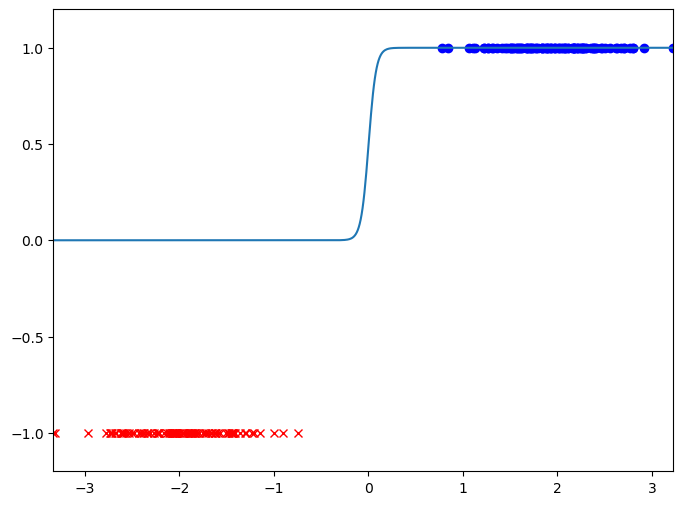

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import torch

xa = torch.cat([0.5*torch.randn((100,))-2, 0.5*torch.randn((100,))+2],dim=0)
ta = torch.cat([-torch.ones(100,1), torch.ones(100,1)],dim=0)
x = torch.tensor(xa, dtype=torch.float64)
t = torch.tensor(ta, dtype=torch.float64)
X = torch.column_stack((torch.ones(x.shape[0]), x))


# initialize guesses for w, b
w_gd = torch.randn((2), requires_grad=True, dtype=torch.float64) # size (1,)
print('Initial guesses: w0={:.6f}, w1={:.6f}'.format(w_gd[0].data, w_gd[1].data))
                         
# information for tracking
b_vals = [w_gd[0].data.item()]
w1_vals = [w_gd[1].data.item()]

n_iter = 1000 # number of iterations
alpha = 1e-3 # step size
for n in range(n_iter):
    loss = torch.sum(torch.log(1+torch.exp(-(X@w_gd)*t)))
    loss.backward()
    with torch.no_grad():
        w_gd -= alpha*w_gd.grad
        w_gd.grad = None
        
    # log information
    w1_vals.append(w_gd[1].data.item())
    b_vals.append(w_gd[0].data.item())
    
# examine solution
print('Final guesses: w0={:.6f}, w1={:.6f}'.format(w_gd[0].data, w_gd[1].data))


fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(xa[0:100],ta[0:100],'rx')
plt.plot(xa[100:200],ta[100:200],'bo')
linestyles = ['dashed', 'solid', 'dashed']
linecolors = ['blue', 'green', 'red']
offsets = [-1, 0, 1]
# for i in range(len(offsets)):
#     xx = np.arange(min(x),max(x),0.1)
#     yy = offsets[i]+w1_vals[-1]*xx + b_vals[-1]
#     ax.plot(xx,yy,linestyle=linestyles[i], color=linecolors[i])
xx = torch.arange(min(x),max(x),0.01)
yy = 1/(1+torch.exp(w1_vals[-1]*xx+b_vals[-1]))
ax.plot(xx,yy)
plt.axis([min(xa),max(xa), -1.2, 1.2])
# Save and Show
# plt.savefig("./img/losses_contours.png", dpi=300)
plt.show()

## That's it for today

- Have a good weekend
- HW4 due Monday
- Continue talking about classification and logistic regression Tuesday 

## Additional References

[1] Roger Grosse CSC321 lectures - https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/

[2] Marton Trencseni "SVM with PyTorch" https://bytepawn.com/svm-with-pytorch.html